<a href="https://colab.research.google.com/github/hainmit09/DataAnalysis/blob/main/B%C3%A0i_6_Ki%E1%BB%83m_%C4%91%E1%BB%8Bnh_t%C6%B0%C6%A1ng_quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Các kiểm định tương quan cơ bản:
- Kiểm định pearson
- Kiểm định pearman
- Kiểm định Chi bình phương

Xét bài toán kiểm định giả thiết có giả thiết không (Null Hypothesis)
- H0: Không tương quan
- H1: Có tương quan

#1. Kiểm định pearson
- Ý nghĩa: Đo lường (đo hệ số) mối quan ***hệ tuyến tính*** giữa hai tập dữ liệu.
- Yêu cầu: Dữ liệu so sánh tuần theo phân phối chuẩn.
- Hàm sẽ dùng: scipy.stats.pearsonr(x, y), giá trị trả ra là cặp (r và p-value)
  + r: hệ số tương quan có giá trị từ [-1: 1], r = 0 thì nghĩa là không tương quan gì, r càng gần -1 hoặc 1 càng rất tương quan. -1 tương quan nghịch, 1 là tương quan thuận.
  + p-value: Cho biết mức ý nghĩa của kết quả đánh giá tương quan




Import các thư viện

In [22]:
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt


- Với mức ý nghĩa 5% thì, liệu có thể kết luân hai tập dữ liệu<br/>
x = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]<br/>
y = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]<br>
Có tương với nhau không?


In [10]:
x = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
y = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]


In [15]:

r, p = scipy.stats.pearsonr(x, y)



In [17]:
print("r =", r, "p =", p)

r = 0.6879696368388863 p = 0.02787296951449617


Kết luân:
- Hai tập dữ liệu có tương quan thuận với.
- Do p-value<alpha = 5% nên đủ cơ sở để khẳng định x và y có tương quan với nhau

#2. Kiểm định pearman
- Ý nghĩa: Kiểm định sự tương quan của các tập dữ liệu, hệ số tương quan không phải là tuyến tính
- Hàm sử dụng: scipy.stats.spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')
- Giá trị trả ra:
  + correlation: hệ số tương quan theo pearman
  + p-value.
** Việc đánh giá giống pearson

In [19]:
mr, mp = scipy.stats.spearmanr(x, y)

In [20]:
print("r =", r, "p =", p)
print("mr =", mr, "mp =", mp)

r = 0.6879696368388863 p = 0.02787296951449617
mr = 0.8545454545454544 mp = 0.0016368033159867143


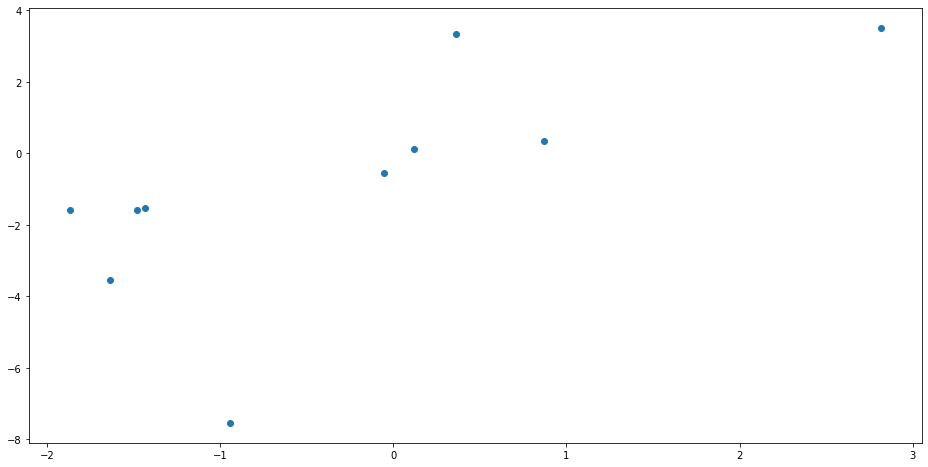

In [23]:
plt.figure(figsize=(16, 8))
plt.scatter(x,y)

#3. Kiểm định chi bình phương (chi2)
- Ý nghĩa: Kiểm định tính phụ thuộc của hai thuộc tính kiểu phân mục (category)
- scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
- Kết quả trả ra: 
  + chi2: Giá trị thống kê
  + p-value: là giá trị xác suất để so sánh với mức ý nghĩa. p-value<alpha thì hai thuộc tính có tính tương quan, ngược lại thì không tương quan

In [24]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [25]:
df =  sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
import pandas as pd

In [30]:
contigency = pd.crosstab(df['sex'], df['smoker'])
contigency


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [33]:
c, p, dof, expected = scipy.stats.chi2_contingency(contigency)
print("c = ", c)
print("p = ", p)

c =  0.008763290531773594
p =  0.925417020494423


Với mức ý nghĩa là alpha = 5% = 0,05 << p , kết luận không có tính tương quan giữa Giới tính và việc hút thuốc